In [117]:
import numpy as np
from matplotlib import pyplot as plt
import time

np.random.seed(time.gmtime())

## Parameters

In [118]:
N = 3        # number of doors
M = 10000    # number of simulations

# 1) One simulation

## Initial Setup

In [119]:
Change = True

In [120]:
doors = np.empty(N, dtype='object')

for i in range(len(doors)): doors[i] = 'goat'
    
k_car = np.random.randint(N)    
doors[k_car] = 'car'

doors

array(['goat', 'car', 'goat'], dtype=object)

## The Game 

The competitor chooses one door, which remains closed

In [121]:
k_chosen = np.random.randint(N)

if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
else : doors[k_chosen] = 'goat&chosen'

doors

array(['goat&chosen', 'car', 'goat'], dtype=object)

The host, who knows were the car is, opens $N-2$ doors with goats behind them

In [122]:
for i in range(len(doors)):
    if k_chosen==k_car : 
        k_closed = np.random.randint(N)
        while (k_closed==k_chosen) : k_closed = np.random.randint(N)
        if (i!=k_chosen and i!=k_car and i!=k_closed) : doors[i] = 'opened'
        
    else : 
        if (i!=k_chosen and i!=k_car) : doors[i] = 'opened'
    
doors

array(['goat&chosen', 'car', 'opened'], dtype=object)

The competitor can change his chosen door

In [123]:
if Change==True : 
    if k_chosen==k_car : 
        doors[k_chosen] = 'car'
        doors[k_closed] = 'goat&chosen'
    else :
        doors[k_chosen] = 'goat'
        doors[k_car] = 'car&chosen'
        
doors

array(['goat', 'car&chosen', 'opened'], dtype=object)

# 2) Repeated simulations

In [124]:
def Simulation(N, Change):
    doors = np.empty(N, dtype='object')
    for i in range(len(doors)): doors[i] = 'goat'
    k_car = np.random.randint(N)    
    doors[k_car] = 'car'
    
    k_chosen = np.random.randint(N)
    if k_chosen==k_car : doors[k_chosen] = 'car&chosen'
    else : doors[k_chosen] = 'goat&chosen'
    
    for i in range(len(doors)):
        if k_chosen==k_car : 
            k_closed = np.random.randint(N)
            while (k_closed==k_chosen) : k_closed = np.random.randint(N)
            if (i!=k_chosen and i!=k_car and i!=k_closed) : doors[i] = 'opened'

        else : 
            if (i!=k_chosen and i!=k_car) : doors[i] = 'opened'
            
    if Change==True : 
        if k_chosen==k_car : 
            doors[k_chosen] = 'car'
            doors[k_closed] = 'goat&chosen'
            temp = k_chosen
            k_chosen = k_closed
            k_closed = temp
        else :
            doors[k_chosen] = 'goat'
            doors[k_car] = 'car&chosen'
            temp = k_chosen
            k_chosen = k_car
            k_car = temp
    
    if doors[k_chosen]=='car&chosen' : result = True
    else : result = False
            
    return result

In [125]:
counter_change = np.zeros(M)
counter_nochange = np.zeros(M)

for i in range(M):
    if i!=0 :
        counter_change[i] = counter_change[i-1]
        counter_nochange[i] = counter_nochange[i-1]
    
    if Simulation(N, True)==True : counter_change[i] += 1
    if Simulation(N, False)==True : counter_nochange[i] += 1

In [126]:
for i in range(M):
    counter_change[i] /= i+1
    counter_nochange[i] /= i+1

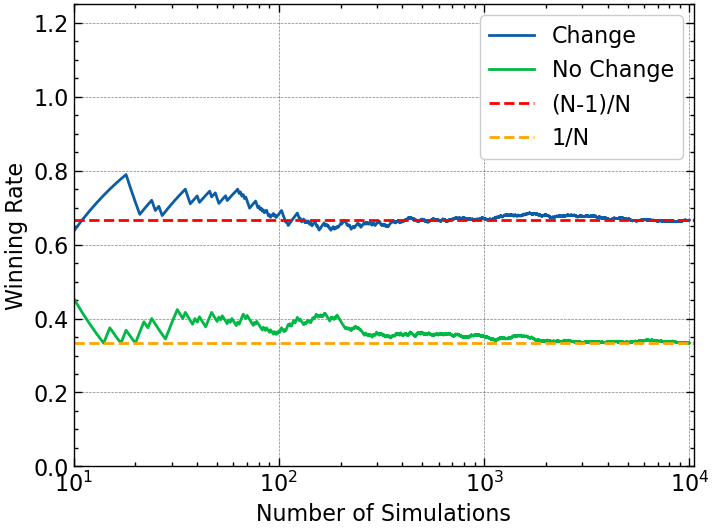

In [127]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 

x = np.arange(0, M, dtype=int)

plt.plot(x, counter_change, label='Change')
plt.plot(x, counter_nochange, label='No Change')
plt.axhline(y=(N-1)/N, color='red', linestyle='--', label='(N-1)/N')
plt.axhline(y=1/N, color='orange', linestyle='--', label='1/N')
plt.xlim(10)
plt.ylim(0, 1.25)
plt.xscale('log')
plt.xlabel('Number of Simulations')
plt.ylabel('Winning Rate')
plt.legend()